## Question 1


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure

# Load the image in grayscale and color
img_gray = cv2.imread('sobel_image.png', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('sobel_image.png')

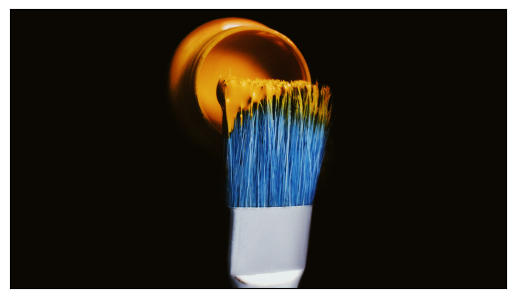

In [14]:
plt.imshow(img_color)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

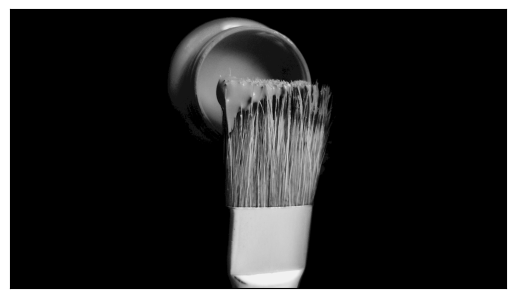

In [16]:
plt.imshow(img_gray,cmap = plt.cm.gray)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

In [4]:
# Define the Sobel kernels for x and y directions
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

### (i) Gx

In [5]:
# Apply the Sobel operator to compute Gx for color and gray image
Gx_gray = cv2.filter2D(img_gray, -1, sobel_kernel_x)
Gx_color = cv2.filter2D(img_color, -1, sobel_kernel_x)

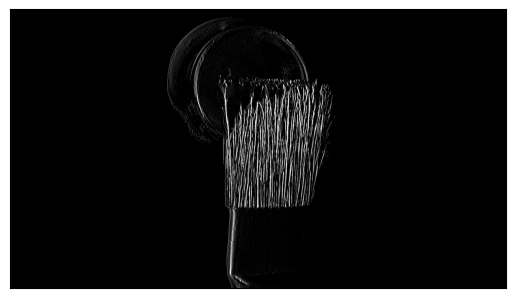

In [17]:
# Gx for gray image
plt.imshow(Gx_gray,cmap = plt.cm.gray)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

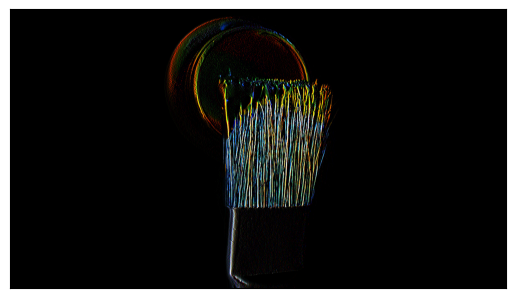

In [18]:
# Gx for color image
plt.imshow(Gx_color)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

### (ii) Gy

In [8]:
# Apply the Sobel operator to compute Gy for color and gray image
Gy_gray = cv2.filter2D(img_gray, -1, sobel_kernel_y)
Gy_color = cv2.filter2D(img_color, -1, sobel_kernel_y)

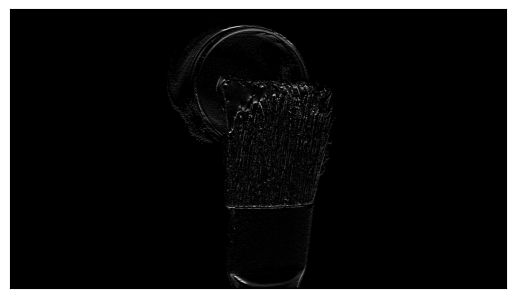

In [19]:
plt.imshow(Gy_gray,cmap = plt.cm.gray)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

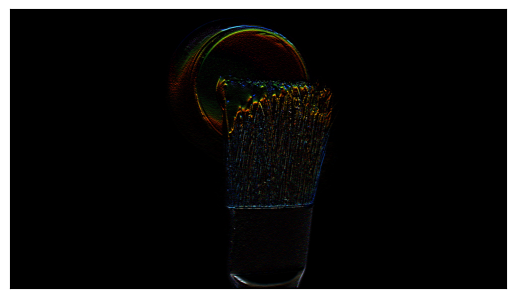

In [20]:
plt.imshow(Gy_color)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

### (iii) Gradient Magnitude

In [11]:
# Compute the gradient magnitude
grad_mag_gray = np.sqrt(Gx_gray**2 + Gy_gray**2)
grad_mag_color = np.sqrt(Gx_color**2 + Gy_color**2)

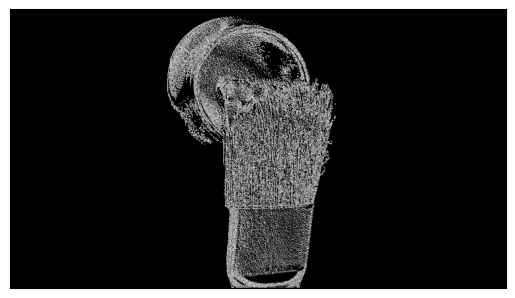

In [21]:
plt.imshow(grad_mag_gray,cmap = plt.cm.gray)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

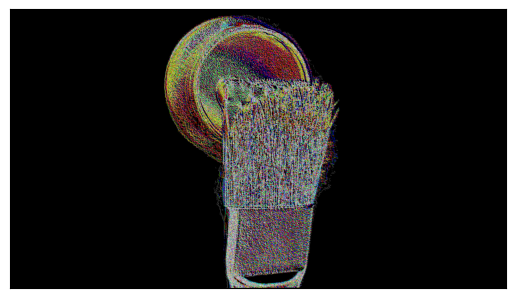

In [22]:
grad_mag_color = skimage.exposure.rescale_intensity(grad_mag_color, in_range='image', out_range=(0,255)).astype(np.uint8)
plt.imshow(grad_mag_color)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()

### (iv)

Interpretation comparing result in color and gray image is:

1.The magnitude of the gradient is generally greater in the color image than in the grayscale image, suggesting that color can be a useful feature for edge detection.<br>2.When compared to a grayscale image, the gradients in a colour image are typically smoother and less noisy.This is because the color image is less affected by small variations in intensity.

# Question 2

(i) Generate an image with salt and pepper noise.

In [1]:
#Initialization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['figure.figsize'] = [8, 6]
plt.figure()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 8,
        }

<Figure size 800x600 with 0 Axes>

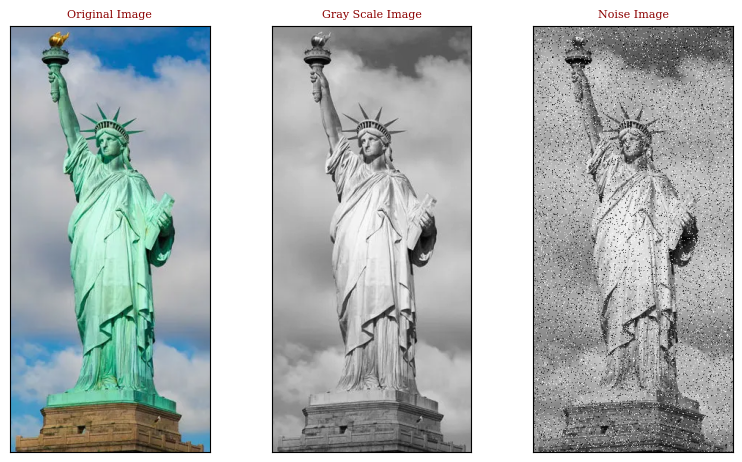

In [52]:
#salt_and_pepper_noise
img = cv2.imread('statue_of_liberty.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise_mask =  np.random.randint(0, 21, size = (noise_img.shape[0], noise_img.shape[1]), dtype=int)

zeros_pixel = np.where(noise_mask == 20)
one_pixel = np.where(noise_mask == 0)
noise_img[zeros_pixel] = 0
noise_img[one_pixel] = 255

fig, axs = plt.subplots(1, 3)
fig.tight_layout()

axs[0].imshow(mpimg.imread('statue_of_liberty.png'))
axs[0].set_title("Original Image",fontdict= font)
axs[1].imshow(img_gray,cmap = plt.cm.gray)
axs[1].set_title("Gray Scale Image",fontdict= font)
axs[2].imshow(noise_img,cmap = plt.cm.gray)
axs[2].set_title("Noise Image",fontdict= font)
for a in axs:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

(ii) Implement a median filter and return the output image (try at least two different window sizes for the filter).

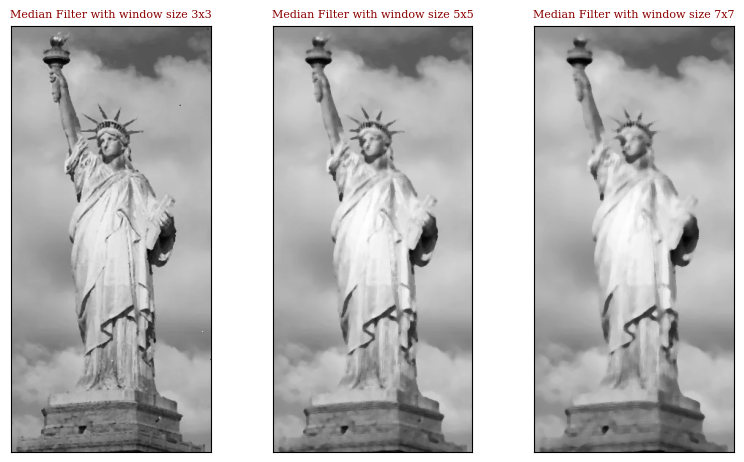

In [53]:
# Implemented two median filters with window size 3 and 5
med1 = cv2.medianBlur(noise_img, 3)
med2 = cv2.medianBlur(noise_img, 5)
med3 = cv2.medianBlur(noise_img, 7)
fig, axs = plt.subplots(1, 3)
fig.tight_layout()
axs[0].imshow(med1,cmap = plt.cm.gray)
axs[0].set_title("Median Filter with window size 3x3",fontdict= font)
axs[1].imshow(med2,cmap = plt.cm.gray)
axs[1].set_title("Median Filter with window size 5x5",fontdict= font)
axs[2].imshow(med3,cmap = plt.cm.gray)
axs[2].set_title("Median Filter with window size 7x7",fontdict= font)
for a in axs:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

(iii) What is the Gaussian filter size (and sigma value (σ)) that achieves a similar level of noise removal (with median filter)?

Similar Noise reduction with gaussian filter is achieved with by having a large kernel size of 55x55 and σ value of 3

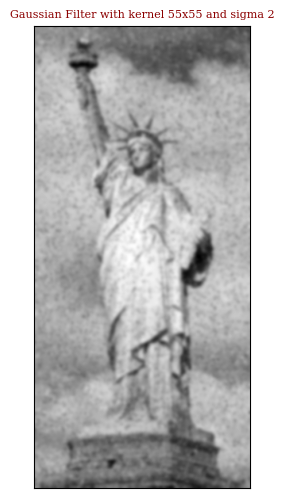

In [57]:

# Find the sigma value that achieves a similar level of noise removal as median filter
gauss3 = cv2.GaussianBlur(noise_img, (55, 55), 2)
plt.imshow(gauss3,cmap=plt.cm.gray)
plt.title("Gaussian Filter with kernel 55x55 and sigma 2",fontdict=font)
a = plt.gca()    
a.set_xticks(())
a.set_yticks(())
plt.show()


(iv) Compare the results obtained via median filter and Gaussian filter.

We can observe that the median filter effectively removes the salt and pepper noise, while preserving the edges in the image. However, the median filter also tends to blur the image slightly, especially with the larger 5x5 & 7x7 window sizes. On the other hand, the Gaussian filter is able to remove the noise to a similar extent as the median filter, but with a very high kernel size in this case 55x55 and sigma value of 3, but still not equivalent to the noise reduction by median filter and we can also observe that increasing the sigma value of the Gaussian filter tends to increase the level of blurring in the image.


# Question 3

Use a Python implementation of Canny’s edge detector (on any image of interest) to generate a
series of images indicating the effects of scale and contrast thresholds (at least three) on the edges
that are detected. How easy is it to set up the edge detector to mark only object boundaries and
in what application(s) would this be easy to achieve?

To set up the Canny edge detector to mark only object boundaries, we need to choose appropriate scale and contrast thresholds. In general, we want to choose the low threshold to be high enough to filter out noise and low-contrast edges, and the high threshold to be low enough to detect all the relevant edges.In our case Image 4 , we use low of 0.4 and high of 0.45 & sigma of 1 which was quite effective in the main object detection<br>
If we set the low and high thresholds to be very close, the detector will only mark strong edges and suppress all weak edges. This is useful when we want to detect only the boundaries of objects in an image.<br>
This approach can be useful in various applications, such as object detection and tracking, medical imaging, and robotics, where accurate object boundary detection is critical.<br>



<class 'numpy.ndarray'>


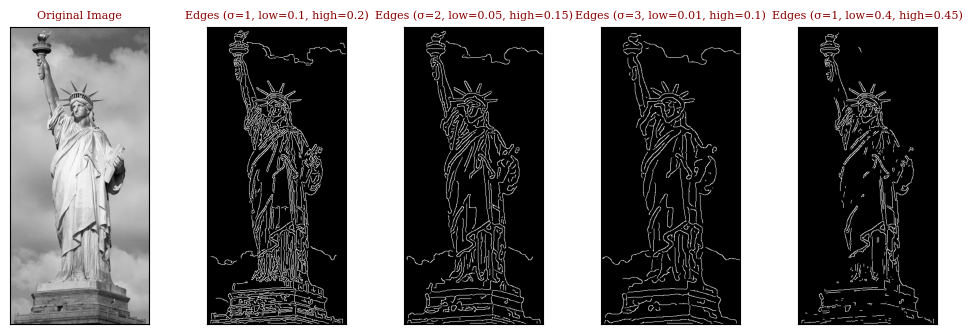

In [58]:
from skimage import io, feature
import matplotlib.pyplot as plt

# Load an image
image = io.imread('statue_of_liberty.png', as_gray=True)
print(type(image))
# Apply the Canny edge detector with different scale and contrast thresholds
edges1 = feature.canny(image, sigma=1, low_threshold=0.1, high_threshold=0.2)
edges2 = feature.canny(image, sigma=2, low_threshold=0.05, high_threshold=0.15)
edges3 = feature.canny(image, sigma=3, low_threshold=0.01, high_threshold=0.1)
edges4 = feature.canny(image, sigma=1, low_threshold=0.4, high_threshold=0.45)


# Plot the resulting images
fig, ax = plt.subplots(ncols=5, figsize=(10, 5))
fig.tight_layout()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image',fontdict= font)
ax[1].imshow(edges1, cmap='gray')
ax[1].set_title('Edges (σ=1, low=0.1, high=0.2)',fontdict= font)
ax[2].imshow(edges2, cmap='gray')
ax[2].set_title('Edges (σ=2, low=0.05, high=0.15)',fontdict= font)
ax[3].imshow(edges3, cmap='gray')
ax[3].set_title('Edges (σ=3, low=0.01, high=0.1)',fontdict= font)
ax[4].imshow(edges4, cmap='gray')
ax[4].set_title('Edges (σ=1, low=0.4, high=0.45)',fontdict= font)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()
